# Mcdonald's Case Study

* Plot graphically which food categories have the highest and lowest varieties.
* Which all variables have an outlier?
* Which variables have the highest correlation? Plot them and find out the value?
* Which category contributes to the maximum % of Cholesterol in a diet (% daily value)?
* Which item contributes maximum to the Sodium intake?
* Which 4 food items contain the most amount of Saturated Fat?

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df= pd.read_csv('Mcdonald .csv')

### Exploratory Data analysis

In [4]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [5]:
df[['Category', 'Item']]

,Category,Item
0,Breakfast,Egg McMuffin
1,Breakfast,Egg White Delight
2,Breakfast,Sausage McMuffin
3,Breakfast,Sausage McMuffin with Egg
4,Breakfast,Sausage McMuffin with Egg Whites
...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small)
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium)
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack)
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium)


In [6]:
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [7]:
df.shape

(260, 24)

In [8]:
df.loc[:, 'Category'].nunique()

9

In [9]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Calories,260.0,368.27,240.27,0.0,210.00,340.0,500.00,1880.0
Calories from Fat,260.0,127.10,127.88,0.0,20.00,100.0,200.00,1060.0
Total Fat,260.0,14.17,14.21,0.0,2.38,11.0,22.25,118.0
Total Fat (% Daily Value),260.0,21.82,21.89,0.0,3.75,17.0,35.00,182.0
Saturated Fat,260.0,6.01,5.32,0.0,1.00,5.0,10.00,20.0
Saturated Fat (% Daily Value),260.0,29.97,26.64,0.0,4.75,24.0,48.00,102.0
Trans Fat,260.0,0.20,0.43,0.0,0.00,0.0,0.00,2.5
Cholesterol,260.0,54.94,87.27,0.0,5.00,35.0,65.00,575.0
Cholesterol (% Daily Value),260.0,18.39,29.09,0.0,2.00,11.0,21.25,192.0
Sodium,260.0,495.75,577.03,0.0,107.50,190.0,865.00,3600.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

#### Univariate analysis

#### I have dropping some variables like 'Total Fat', 'Saturated Fat' etc and kept their daily value measure since its more sensible to analyse the daily value nutritional content

In [14]:
df_new= df.drop(['Total Fat','Saturated Fat','Trans Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber'], axis= 'columns')

In [15]:
df_new

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,20,25,87,31,10,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,12,15,8,32,10,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,35,42,15,33,10,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,43,52,95,36,10,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,35,42,16,37,10,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,26,44,14,12,27,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,35,58,19,16,35,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,17,29,9,8,18,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,50,76,20,17,38,9,103,21,20,0,60,6


In [16]:
def UnivariateAnalysis (column):
    print('Description of '+ column)
    print('---------------------------------------------------------------------')
    print(df_new[column].describe(), end=' ')
    
    
    plt.figure()
    print('Distribution of '+ column)
    print('---------------------------------------------------------------------')
    sns.displot(df_new[column], kde= False)
    plt.show
    
        
    plt.figure()
    print('Boxplot of '+ column)
    print('---------------------------------------------------------------------')
    sns.boxplot(x=df_new[column])
    plt.show
    
    

In [17]:
df_numeric= df_new.select_dtypes(include=['int64', 'float64'])
dfnum_col= list(df_numeric.columns.values)
dfnum_col

['Calories',
 'Calories from Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat (% Daily Value)',
 'Cholesterol (% Daily Value)',
 'Sodium (% Daily Value)',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)']

Description of Calories
---------------------------------------------------------------------
count     260.000000
mean      368.269231
std       240.269886
min         0.000000
25%       210.000000
50%       340.000000
75%       500.000000
max      1880.000000
Name: Calories, dtype: float64 Distribution of Calories
---------------------------------------------------------------------
Boxplot of Calories
---------------------------------------------------------------------
Description of Calories from Fat
---------------------------------------------------------------------
count     260.000000
mean      127.096154
std       127.875914
min         0.000000
25%        20.000000
50%       100.000000
75%       200.000000
max      1060.000000
Name: Calories from Fat, dtype: float64 Distribution of Calories from Fat
---------------------------------------------------------------------
Boxplot of Calories from Fat
---------------------------------------------------------------------
Descript

<ipython-input-16-3f8b0e7e12f0>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Boxplot of Carbohydrates (% Daily Value)
---------------------------------------------------------------------
Description of Dietary Fiber (% Daily Value)
---------------------------------------------------------------------
count    260.000000
mean       6.530769
std        6.307057
min        0.000000
25%        0.000000
50%        5.000000
75%       10.000000
max       28.000000
Name: Dietary Fiber (% Daily Value), dtype: float64 Distribution of Dietary Fiber (% Daily Value)
---------------------------------------------------------------------
Boxplot of Dietary Fiber (% Daily Value)
---------------------------------------------------------------------
Description of Sugars
---------------------------------------------------------------------
count    260.000000
mean      29.423077
std       28.679797
min        0.000000
25%        5.750000
50%       17.500000
75%       48.000000
max      128.000000
Name: Sugars, dtype: float64 Distribution of Sugars
-------------------------------

<Figure size 432x288 with 0 Axes>

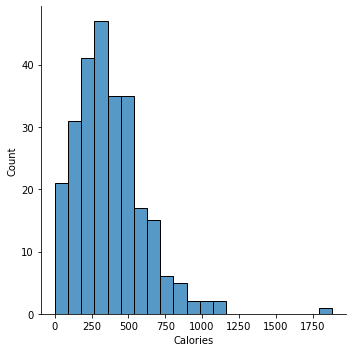

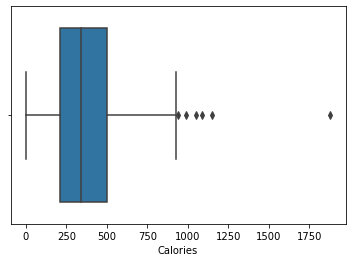

<Figure size 432x288 with 0 Axes>

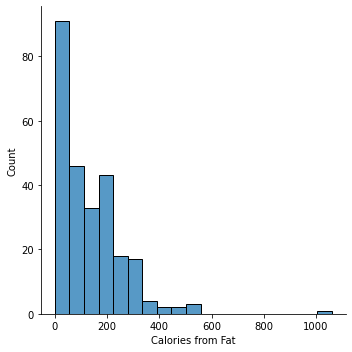

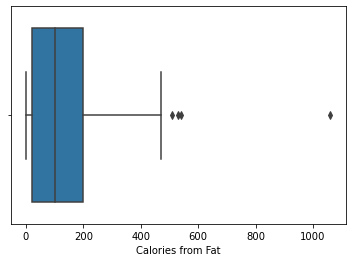

<Figure size 432x288 with 0 Axes>

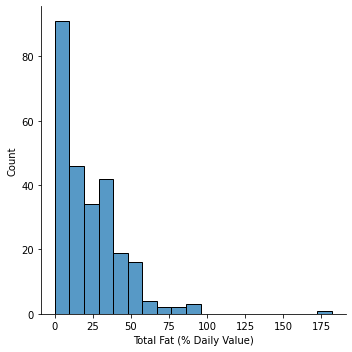

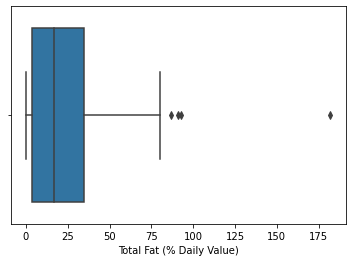

<Figure size 432x288 with 0 Axes>

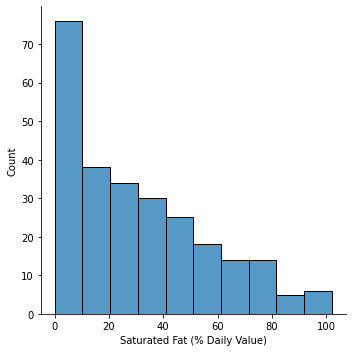

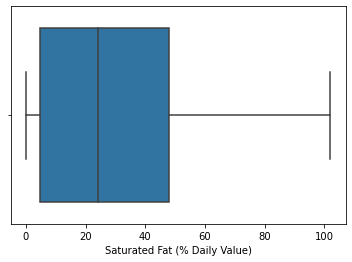

<Figure size 432x288 with 0 Axes>

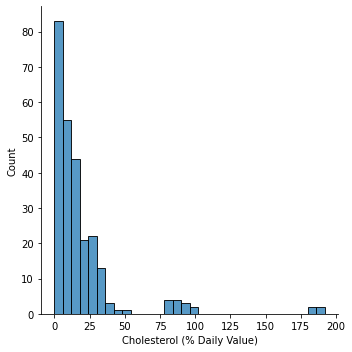

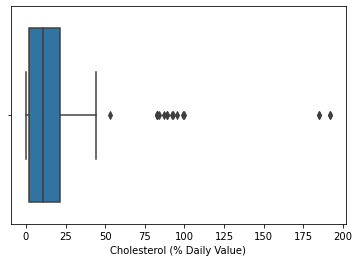

<Figure size 432x288 with 0 Axes>

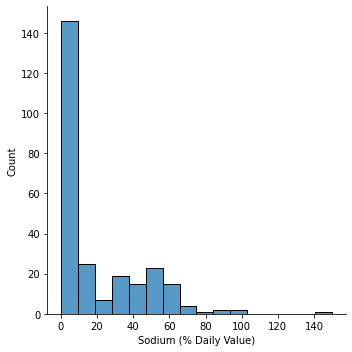

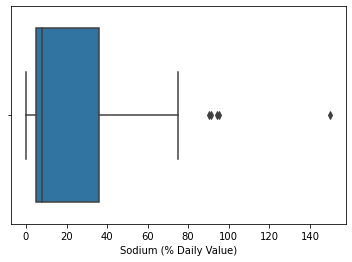

<Figure size 432x288 with 0 Axes>

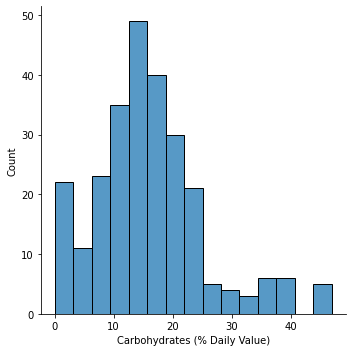

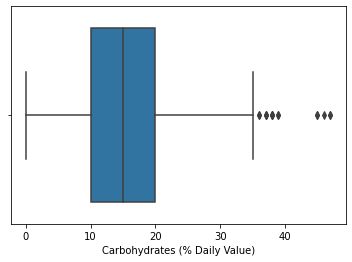

<Figure size 432x288 with 0 Axes>

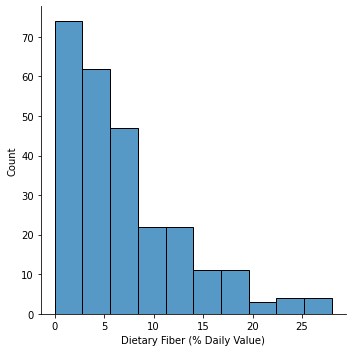

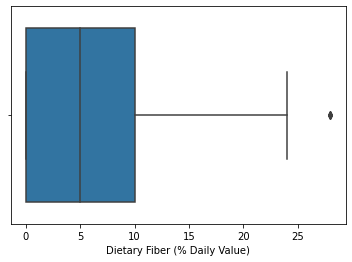

<Figure size 432x288 with 0 Axes>

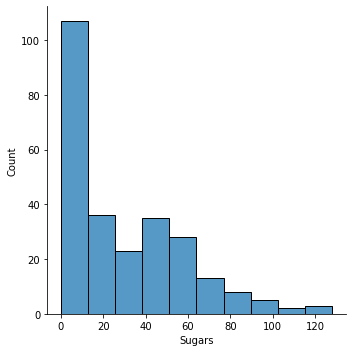

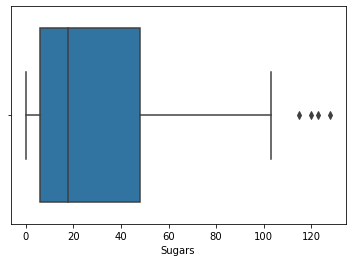

<Figure size 432x288 with 0 Axes>

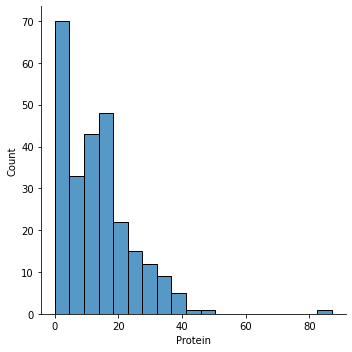

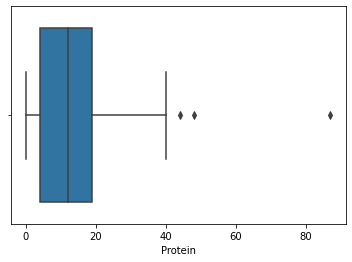

<Figure size 432x288 with 0 Axes>

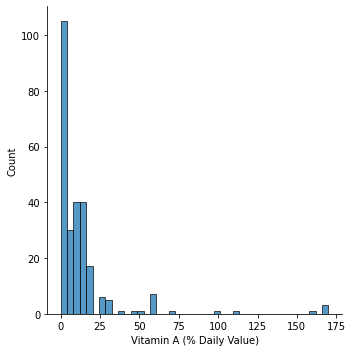

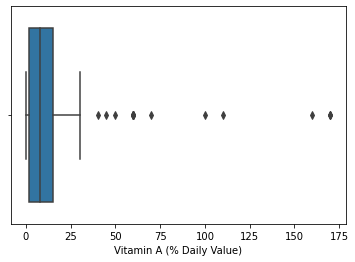

<Figure size 432x288 with 0 Axes>

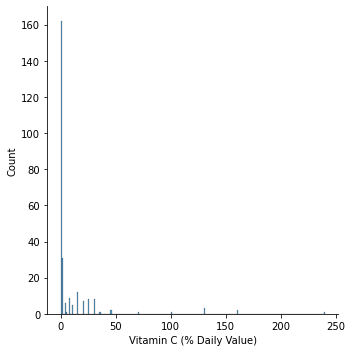

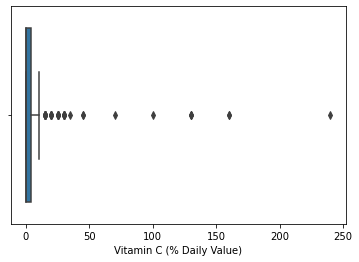

<Figure size 432x288 with 0 Axes>

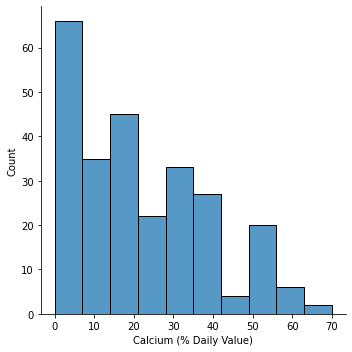

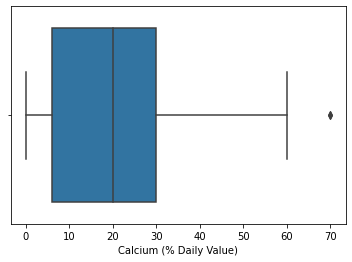

<Figure size 432x288 with 0 Axes>

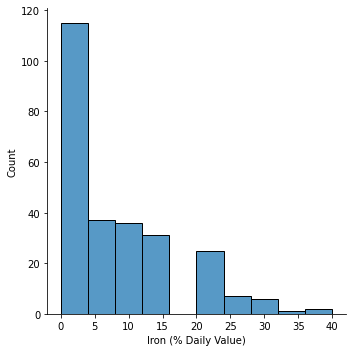

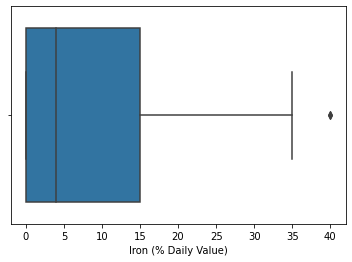

In [18]:
for x in dfnum_col:
    UnivariateAnalysis(x)

#### Skewness

In [42]:
df_numeric.skew(axis=0).sort_values(ascending=False)

Vitamin C (% Daily Value)        5.502231
Vitamin A (% Daily Value)        4.580331
Cholesterol (% Daily Value)      3.804200
Total Fat (% Daily Value)        2.162011
Calories from Fat                2.145508
Protein                          1.579924
Sodium (% Daily Value)           1.545986
Calories                         1.452498
Iron (% Daily Value)             1.187908
Dietary Fiber (% Daily Value)    1.154245
Sugars                           1.031940
Carbohydrates (% Daily Value)    0.903599
Saturated Fat (% Daily Value)    0.685296
Calcium (% Daily Value)          0.593555
dtype: float64

#### Outlier from box-plot

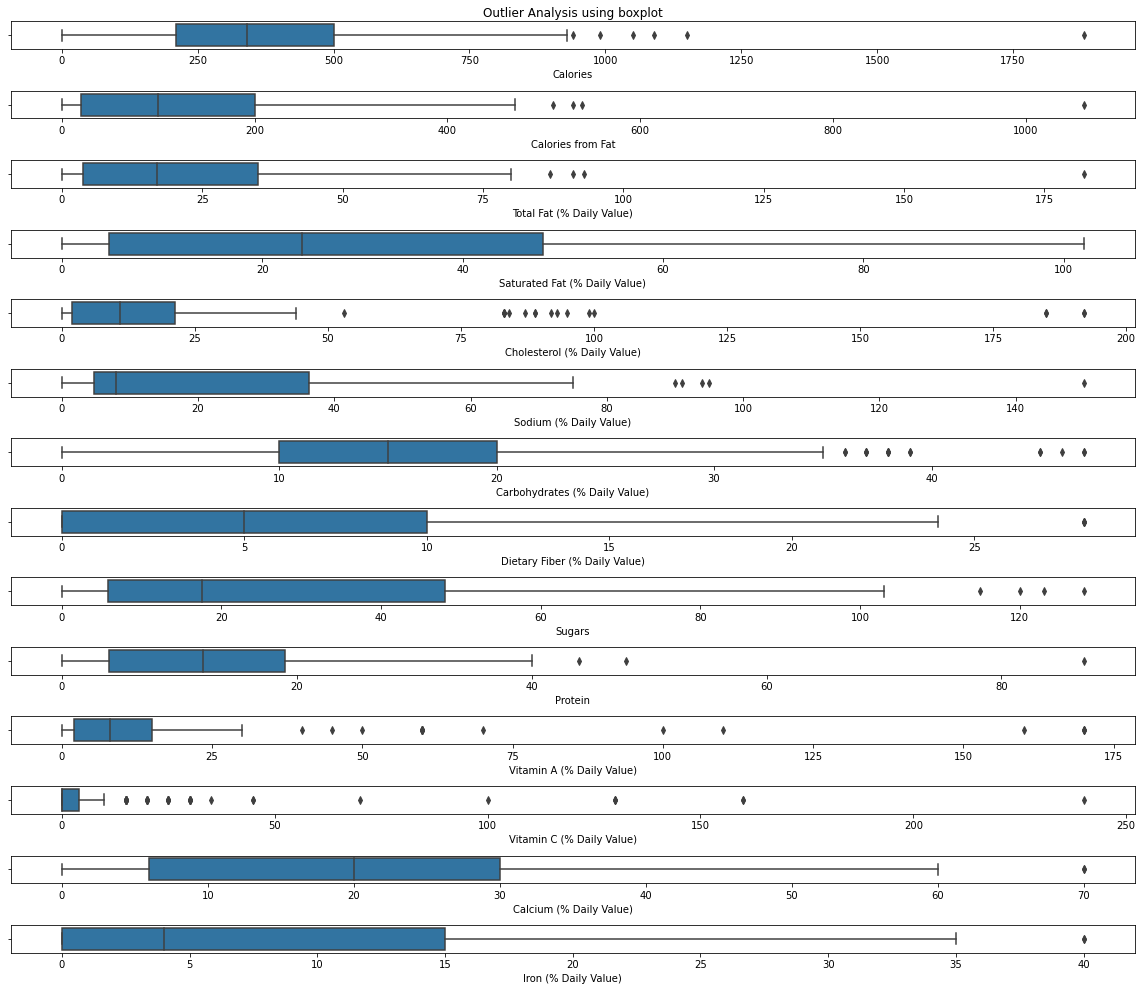

In [30]:
fig,ax=plt.subplots(14, figsize=(16,14))
ax=ax.flatten()

for i,c in enumerate(df_numeric):
    sns.boxplot(x=df_numeric[c], ax=ax[i])
    plt.suptitle('Outlier Analysis using boxplot', fontsize=12)
fig.tight_layout()

### Bivariate analysis

In [43]:
corr = df_new.corr().round(2)
corr

,Calories,Calories from Fat,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Calories,1.00,0.90,0.90,0.85,0.60,0.71,0.78,0.54,0.26,0.79,0.11,-0.07,0.43,0.64
Calories from Fat,0.90,1.00,1.00,0.85,0.68,0.85,0.46,0.58,-0.12,0.81,0.06,-0.09,0.16,0.74
Total Fat (% Daily Value),0.90,1.00,1.00,0.85,0.68,0.85,0.46,0.58,-0.12,0.81,0.05,-0.09,0.16,0.74
Saturated Fat (% Daily Value),0.85,0.85,0.85,1.00,0.63,0.59,0.59,0.35,0.20,0.61,0.07,-0.18,0.40,0.58
Cholesterol (% Daily Value),0.60,0.68,0.68,0.63,1.00,0.62,0.27,0.44,-0.14,0.56,0.08,-0.08,0.13,0.65
Sodium (% Daily Value),0.71,0.85,0.85,0.59,0.62,1.00,0.20,0.69,-0.42,0.87,0.08,-0.03,-0.02,0.87
Carbohydrates (% Daily Value),0.78,0.46,0.46,0.59,0.27,0.20,1.00,0.23,0.76,0.35,0.08,-0.04,0.59,0.21
Dietary Fiber (% Daily Value),0.54,0.58,0.58,0.35,0.44,0.69,0.23,1.00,-0.29,0.66,0.36,0.15,0.05,0.74
Sugars,0.26,-0.12,-0.12,0.20,-0.14,-0.42,0.76,-0.29,1.00,-0.18,0.05,-0.07,0.60,-0.36
Protein,0.79,0.81,0.81,0.61,0.56,0.87,0.35,0.66,-0.18,1.00,0.21,-0.05,0.33,0.79


<AxesSubplot:>

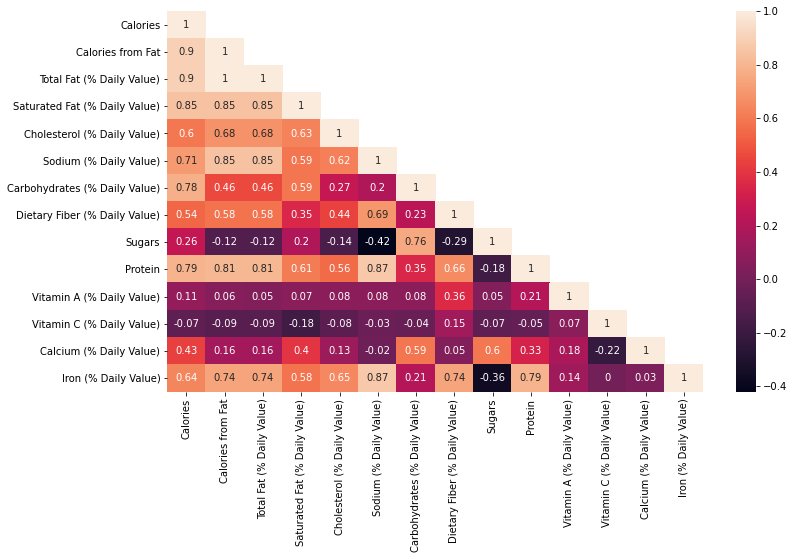

In [44]:
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True, mask=np.triu(df_new.iloc[:,0:17].corr(),+1))

**Plot graphically which food categories have the highest and lowest varieties.**

C:\Users\Aruneema\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


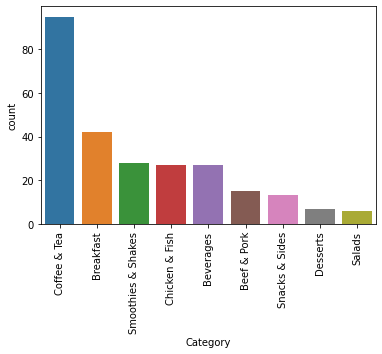

In [45]:
sns.countplot(df['Category'],order= df['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [46]:
df_new2 = df_new.drop(['Calories','Calories from Fat'], axis= 'columns')


<AxesSubplot:xlabel='Category'>

<Figure size 720x1440 with 0 Axes>

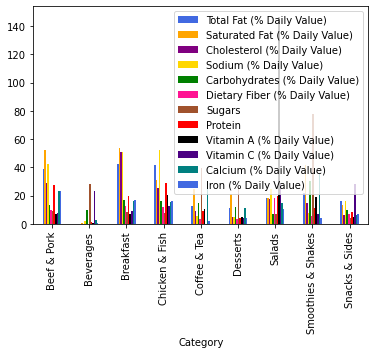

In [47]:
c = ['royalblue', 'orange', 'purple', 'gold', 'green', 'deeppink', 'sienna', 'red', 'black', 'indigo', 'teal']
plt.figure(figsize =(10, 20))
df_new2.groupby('Category').mean().plot(kind = 'bar', color= c)



<AxesSubplot:xlabel='Category'>

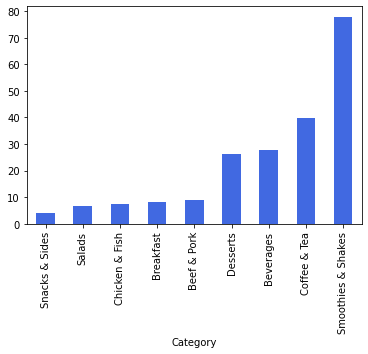

In [48]:
df.groupby('Category').mean()['Sugars'].sort_values(ascending = True).plot(kind = 'bar', color='royalblue')

**Which all variables have an outlier?**

<AxesSubplot:>

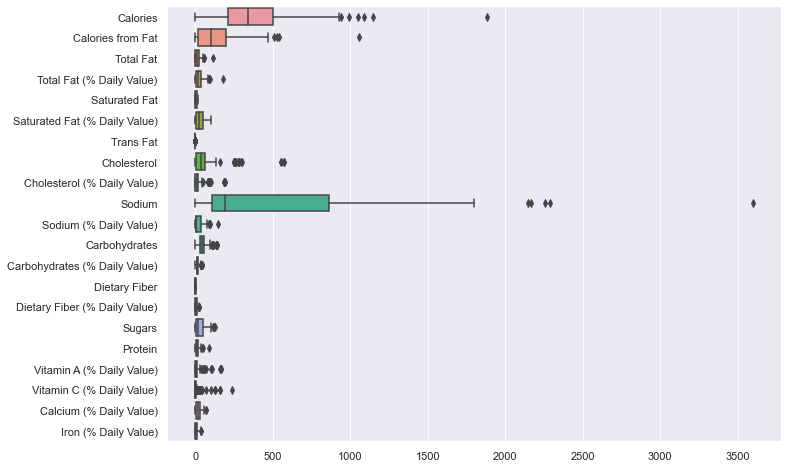

In [49]:

sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot(data=df, orient='h')


**Which category contributes to the maximum % of Cholesterol in a diet (% daily value)?**

In [50]:
cholesterol_total= df.groupby('Category')['Cholesterol (% Daily Value)'].sum().sort_values()
cholesterol_total

Category
Beverages                5
Desserts                34
Snacks & Sides          81
Salads                 104
Smoothies & Shakes     412
Beef & Pork            434
Chicken & Fish         681
Coffee & Tea           891
Breakfast             2140
Name: Cholesterol (% Daily Value), dtype: int64

In [51]:
perc_cholesterol= ((cholesterol_total/df['Cholesterol (% Daily Value)'].sum())*100).round(2)
perc_cholesterol

Category
Beverages              0.10
Desserts               0.71
Snacks & Sides         1.69
Salads                 2.17
Smoothies & Shakes     8.62
Beef & Pork            9.08
Chicken & Fish        14.24
Coffee & Tea          18.63
Breakfast             44.75
Name: Cholesterol (% Daily Value), dtype: float64

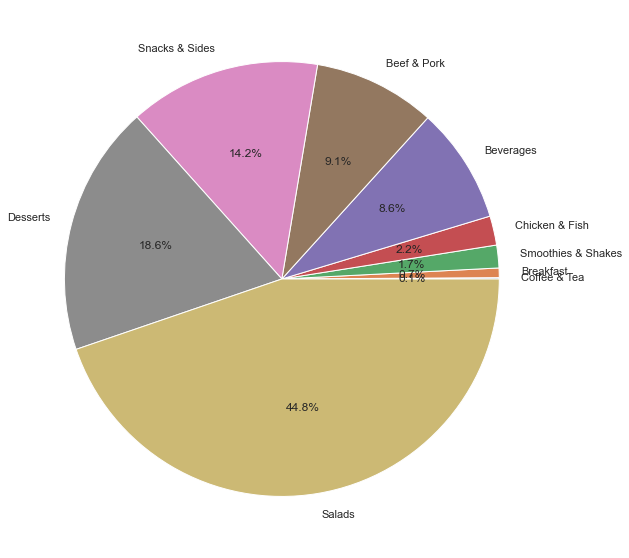

In [52]:
fig = plt.figure(figsize =(10, 10))
plt.pie(perc_cholesterol,labels = df['Category'].value_counts().index, autopct= '%1.1f%%')
  
# show plot
plt.show()

**Which variables have the highest correlation? Plot them and find out the value?**

In [53]:
corr = df.corr().round(2)
corr

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Calories,1.00,0.90,0.90,0.90,0.85,0.85,0.52,0.60,0.60,0.71,...,0.78,0.78,0.54,0.54,0.26,0.79,0.11,-0.07,0.43,0.64
Calories from Fat,0.90,1.00,1.00,1.00,0.85,0.85,0.43,0.68,0.68,0.85,...,0.46,0.46,0.58,0.58,-0.12,0.81,0.06,-0.09,0.16,0.74
Total Fat,0.90,1.00,1.00,1.00,0.85,0.85,0.43,0.68,0.68,0.85,...,0.46,0.46,0.58,0.58,-0.12,0.81,0.05,-0.09,0.16,0.73
Total Fat (% Daily Value),0.90,1.00,1.00,1.00,0.85,0.85,0.43,0.68,0.68,0.85,...,0.46,0.46,0.58,0.58,-0.12,0.81,0.05,-0.09,0.16,0.74
Saturated Fat,0.85,0.85,0.85,0.85,1.00,1.00,0.62,0.63,0.63,0.58,...,0.59,0.59,0.35,0.35,0.20,0.60,0.06,-0.18,0.40,0.58
Saturated Fat (% Daily Value),0.85,0.85,0.85,0.85,1.00,1.00,0.62,0.63,0.63,0.59,...,0.59,0.59,0.36,0.35,0.20,0.61,0.07,-0.18,0.40,0.58
Trans Fat,0.52,0.43,0.43,0.43,0.62,0.62,1.00,0.25,0.25,0.19,...,0.46,0.46,0.05,0.06,0.33,0.39,0.08,-0.08,0.39,0.33
Cholesterol,0.60,0.68,0.68,0.68,0.63,0.63,0.25,1.00,1.00,0.62,...,0.27,0.27,0.44,0.44,-0.14,0.56,0.08,-0.08,0.13,0.65
Cholesterol (% Daily Value),0.60,0.68,0.68,0.68,0.63,0.63,0.25,1.00,1.00,0.62,...,0.27,0.27,0.43,0.44,-0.14,0.56,0.08,-0.08,0.13,0.65
Sodium,0.71,0.85,0.85,0.85,0.58,0.59,0.19,0.62,0.62,1.00,...,0.20,0.20,0.69,0.69,-0.43,0.87,0.08,-0.03,-0.02,0.87


<AxesSubplot:>

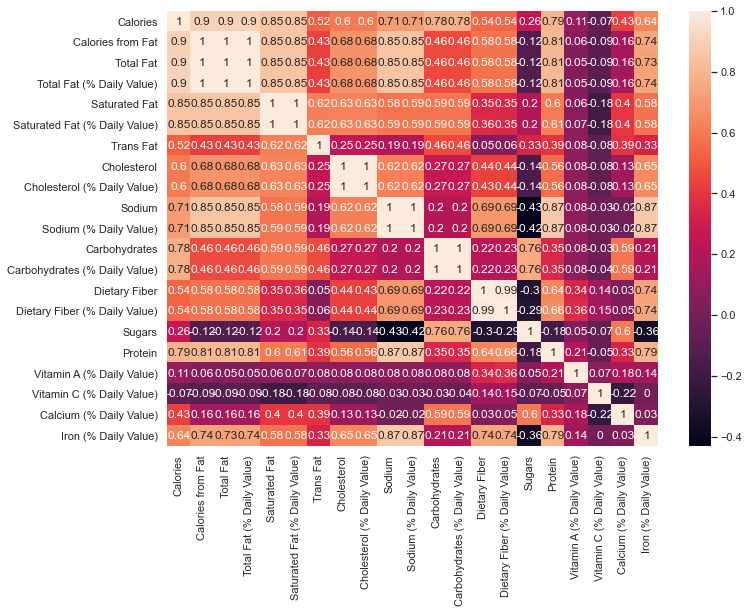

In [54]:
sns.heatmap(corr, annot=True)

**Which item contributes maximum to the Sodium intake?**

In [55]:
sodium_total= df.groupby('Item')['Sodium'].sum().sort_values(ascending=False)
sodium_total

Item
Chicken McNuggets (40 piece)                                    3600
Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)      2290
Big Breakfast with Hotcakes (Large Biscuit)                     2260
Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit)    2170
Big Breakfast with Hotcakes (Regular Biscuit)                   2150
                                                                ... 
Coca-Cola Classic (Child)                                          0
Dasani Water Bottle                                                0
Minute Maid Orange Juice (Medium)                                  0
Apple Slices                                                       0
Minute Maid Orange Juice (Small)                                   0
Name: Sodium, Length: 260, dtype: int64

**Which 4 food items contain the most amount of Saturated Fat?**


In [57]:
Sat_Fat_total= df.groupby('Item')['Saturated Fat'].sum().sort_values(ascending=False)
Sat_Fat_total

Item
McFlurry with M&M’s Candies (Medium)           20.0
Big Breakfast with Hotcakes (Large Biscuit)    20.0
Chicken McNuggets (40 piece)                   20.0
Frappé Chocolate Chip (Large)                  20.0
Double Quarter Pounder with Cheese             19.0
                                               ... 
Diet Dr Pepper (Small)                          0.0
Diet Dr Pepper (Medium)                         0.0
Diet Dr Pepper (Large)                          0.0
Diet Dr Pepper (Child)                          0.0
Minute Maid Orange Juice (Large)                0.0
Name: Saturated Fat, Length: 260, dtype: float64

In [59]:
from platform import python_version
python_version()

'3.8.8'